## RETO - CAMPAÑA DE MARKETING DE UN BANCO PORTUGUÉS

# VISUALIZACIÓN Y CONCLUSIONES

- 1 Carga de librerías
- 2 Carga del dataset y breve EDA
- 3 Visualizaciones respecto de la métrica principal (suscripciones)
- 4 Conclusiones

# 1 Carga de librerías

In [79]:
# Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# Librerías de visualización
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 2 Carga del dataset y breve EDA

In [80]:
bank = pd.read_csv('DataSource/bank-limpio-sin-nulos.csv', index_col = 0)

In [81]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,date,latitude,longitude,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,contact_month,contact_year
0,39.0,housemaid,married,basic 4y,No,No,No,telephone,261,1,unknown,0,nonexistent,1.1,93.994,-36.4,4.8570,5191.0,no,2019-08-02,41.495,-71.233,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,agosto,2019.0
1,57.0,services,married,high school,No,No,No,telephone,149,1,unknown,0,nonexistent,1.1,93.994,-36.4,4.7866,5191.0,no,2016-09-14,34.601,-83.923,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,septiembre,2016.0
2,37.0,services,married,high school,No,Si,No,telephone,226,1,unknown,0,nonexistent,1.1,93.994,-36.4,4.8570,5191.0,no,2019-02-15,34.939,-94.847,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,febrero,2019.0


In [82]:
# Vamos ahora a ver las dimensiones de nuestro DF
print(f"El número de filas que tenemos es {bank.shape[0]}, y el número de columnas es {bank.shape[1]}")

El número de filas que tenemos es 43000, y el número de columnas es 30


In [83]:
# Veamos los tipos de las columnas y la presencia o no de nulos en las mismas
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 42999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43000 non-null  float64
 1   job                43000 non-null  object 
 2   marital            43000 non-null  object 
 3   education          43000 non-null  object 
 4   default            43000 non-null  object 
 5   housing            43000 non-null  object 
 6   loan               43000 non-null  object 
 7   contact            43000 non-null  object 
 8   duration           43000 non-null  int64  
 9   campaign           43000 non-null  int64  
 10  pdays              43000 non-null  object 
 11  previous           43000 non-null  int64  
 12  poutcome           43000 non-null  object 
 13  emp_var_rate       43000 non-null  float64
 14  cons_price_idx     43000 non-null  float64
 15  cons_conf_idx      43000 non-null  float64
 16  euribor3m          43000 no

Podemos ver que no hay nulos en ninguna de las columnas y todos los tipos parecen corresponder excepto el de la columna 'date', que debería ser tipo 'datetime'

In [84]:
# Vemos los principales estadísticos de las columnas numéricas
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43000.0,39.943703,9.927421,17.000,32.20000,39.000000,46.00000,98.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.000000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.000000,3.00000,56.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.000000,0.00000,7.000
emp_var_rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.100000,1.40000,1.400
cons_price_idx,43000.0,93.574219,0.576365,92.201,93.07500,93.574219,93.99400,94.767
cons_conf_idx,43000.0,-40.509049,4.637186,-50.800,-42.70000,-41.800000,-36.40000,-26.900
euribor3m,43000.0,3.549873,1.612193,0.634,1.40600,4.225200,4.95900,5.045
nr_employed,43000.0,5166.852602,72.411125,4963.600,5099.10000,5191.000000,5228.10000,5228.100
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.761000,43.11325,49.384


In [85]:
# Hacemos lo propio para las columnas categóricas.
bank.describe(include = 'O').T

,count,unique,top,freq
job,43000,12,admin.,10873
marital,43000,3,married,26084
education,43000,8,university degree,12722
default,43000,2,No,42997
housing,43000,3,Si,22498
loan,43000,2,No,36468
contact,43000,2,cellular,27396
pdays,43000,27,unknown,41412
poutcome,43000,3,nonexistent,37103
y,43000,2,no,38156


In [86]:
# Creamos un DF sólo con las columnas categóricas
bank_cat = bank.select_dtypes(include = 'O')

In [87]:
# Iteramos por cada columna categórica para ver los valores únicos y el conteo de cada uno
for col in bank_cat.columns.tolist():
    print(f'Para la columna {col.upper()}:\n')
    print(f'Los valóres únicos son: {bank[col].unique()}\n')
    print(f'El conteo de valores únicos es:\n{bank[col].value_counts()}')
    print('-----------')

Para la columna JOB:

Los valóres únicos son: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

El conteo de valores únicos es:
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
unknown            345
Name: count, dtype: int64
-----------
Para la columna MARITAL:

Los valóres únicos son: ['married' 'single' 'divorced']

El conteo de valores únicos es:
marital
married     26084
single      12105
divorced     4811
Name: count, dtype: int64
-----------
Para la columna EDUCATION:

Los valóres únicos son: ['basic 4y' 'high school' 'basic 6y' 'basic 9y' 'professional course'
 'unknown' 'university degree' 'illiterate']

El conteo de valores únicos es:
education
university degree      12722

### Conclusiones de los valor únicos
- **job**: El resultado principal es 'admin', pero no con una diferencia significativa del siguiente.
- **marital**: Sólo tenemos 3 valores (married, single y divorced), el primero de ellos destaca muy por encima del resto.
- **education**: El resultado principal es 'university degree', es destacable que 'illiterate' solo posee 18 registros.
- **default**: Sólo tenemos dos valores (No y Si), el segundo sólo aparece en 3 registros.
- **housing**: Tres valores (No, Sí y Unknown).
- **loan**: Dos valores únicos (No y Sí), el primero notablemente más presente que el segundo.
- **contact**: Dos valores (telephone y cellular). El segundo tiene casi el doble de registros que el primero.
- **poutcome**: Tres valores (nonexistent, failure, success). Tenemos notablemente más datos del primero que del resto.
- **y**: Dos valores (no, yes). Gran cantidad de noes frente a síes.
- **date**: Muchos valores únicos donde el principal es 'Unknown', por ello la columna era de tipo 'object'
- **id_**: Cada valor sólo aparece una vez, es decir, no tenemos dos registros con el mismo identificador.
- **contact_month**: Uno para cada mes y 'Unknown'

# 3 - Visualización de la métrica principal (suscripciones)

# 3.1 Analizar la métrica principal con un pieplot 

In [88]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'date', 'latitude', 'longitude', 'income',
       'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth', 'id',
       'contact_month', 'contact_year'],
      dtype='object')

In [89]:
# La métrica principal de este análisis es 'y', ya que nuestro cliente quiere saber cuánta gente se ha suscrito o no.
# Hacemos un DF con un groupby agrupando por la columna que queremos estudiar.
bank_y = bank.groupby('y')['id'].count().reset_index()
bank_y

,y,id
0,no,38156
1,yes,4844


In [90]:
fig = px.pie(bank_y, values = 'id', names = 'y', color = ['no','yes'],
             color_discrete_map = {'yes':'#489C9E','no':'#495084'})
fig.update_layout(title = dict(text = "Distribución de las suscripciones.",
															 font = dict(size = 20),
															 automargin = True,
															 yref = 'paper',
															 x = 0.2,
															 y = 1),
							    legend = dict(yanchor = "top",
														    y = 0.99,
														    xanchor = "right",
														    x = 0.75))
fig.show()

Aquí podemos observar que la campaña de marketing no está funcionando especialmente bien. Averigüemos por qué está ocurriendo esto.

# 3.2 Analizar las llamadas realizadas a lo largo de toda la campaña agrupando por mes (gráfica de líneas)

In [105]:
# Primero descartamos los datos desconocidos
date = bank[bank['date'] != 'unknown']

# # Pasamos los datos de la columna 'date' a tipo datetime
date['date'] = pd.to_datetime(date['date'], format = "%Y-%m-%d")

# # Agrupamos contando todas las llamadas que ha habido cada día
date = date.groupby('date')['id'].count().reset_index()

# Sumamos todos los datos agrupándolos por mes
date = date.resample('ME', on = 'date').sum()

date.reset_index(drop = False, inplace = True)

In [93]:
# Generamos nuestra línea temporal
fig = px.line(date, 
							x = 'date', 
							y = 'id', 
							text = 'id',
							labels = dict(date = 'Fecha',
														id = 'Llamadas'))
fig.update_traces(textposition = "top center")
fig.update_layout(title = dict(text = "LLamadas realizadas a lo largo del tiempo", 
															 font = dict(size = 20),
															 automargin = True, 
															 yref = 'paper',
															 x = 0.2,
															 y = 1),
							    legend = dict(yanchor = "top",
														    y = 0.99,
														    xanchor = "right",
														    x = 0.75))
fig.show()

Podemos observar como a lo largo del tiempo no ha habido mucho cambio con el número de llamadas realizadas por mes, todos los meses ha habido entre 700 y 800 llamadas.

# 3.3 Comprueba la distribución de llamadas en función del mes del año indicando si el cliente se ha suscrito o no (countplot con agrupación en la columna ‘y)

Text(0.5, 1.0, 'Distribución de llamadas por mes')

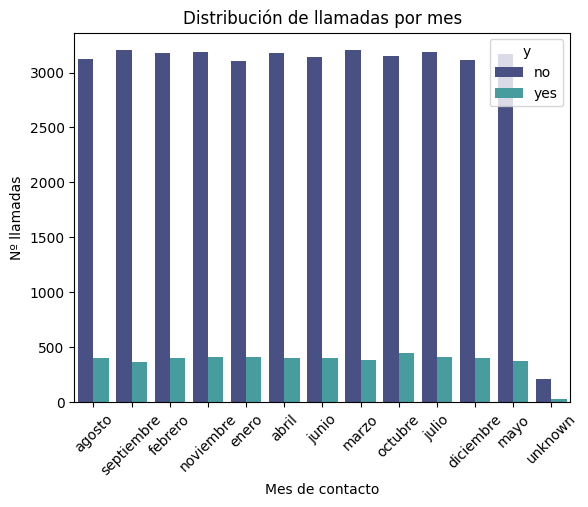

In [94]:
# Decidimos hacer uso aquí de la librería Seaborn
sns.countplot(bank,x = bank['contact_month'], hue = 'y',palette = "mako")
plt.xticks(rotation = 45)

# Cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Mes de contacto")
plt.ylabel("Nº llamadas")
plt.title('Distribución de llamadas por mes')

Aquí podemos ver que la distribución de llamadas ha sido bastante uniforme a lo largo del tiempo. Además podemos ver que no hay diferencias significativas entre la subscripción o no en función del mes.


# 3.4. Análisis de la columna 'y' contra múlitples columnas haciendo uso de subplots con una disposición de 3x2:
- 4 gráficos de barras de las columnas: 'duration', 'numwebvisitsmonth', 'pdays' e ‘income’
- 1 stripplot de la columna ‘campaign’
- 1 violinplot de la columna ‘age’.
En todas las gráficas queremos relacionar las variables con la columna ‘y’

Text(0, 0.5, 'Edad')

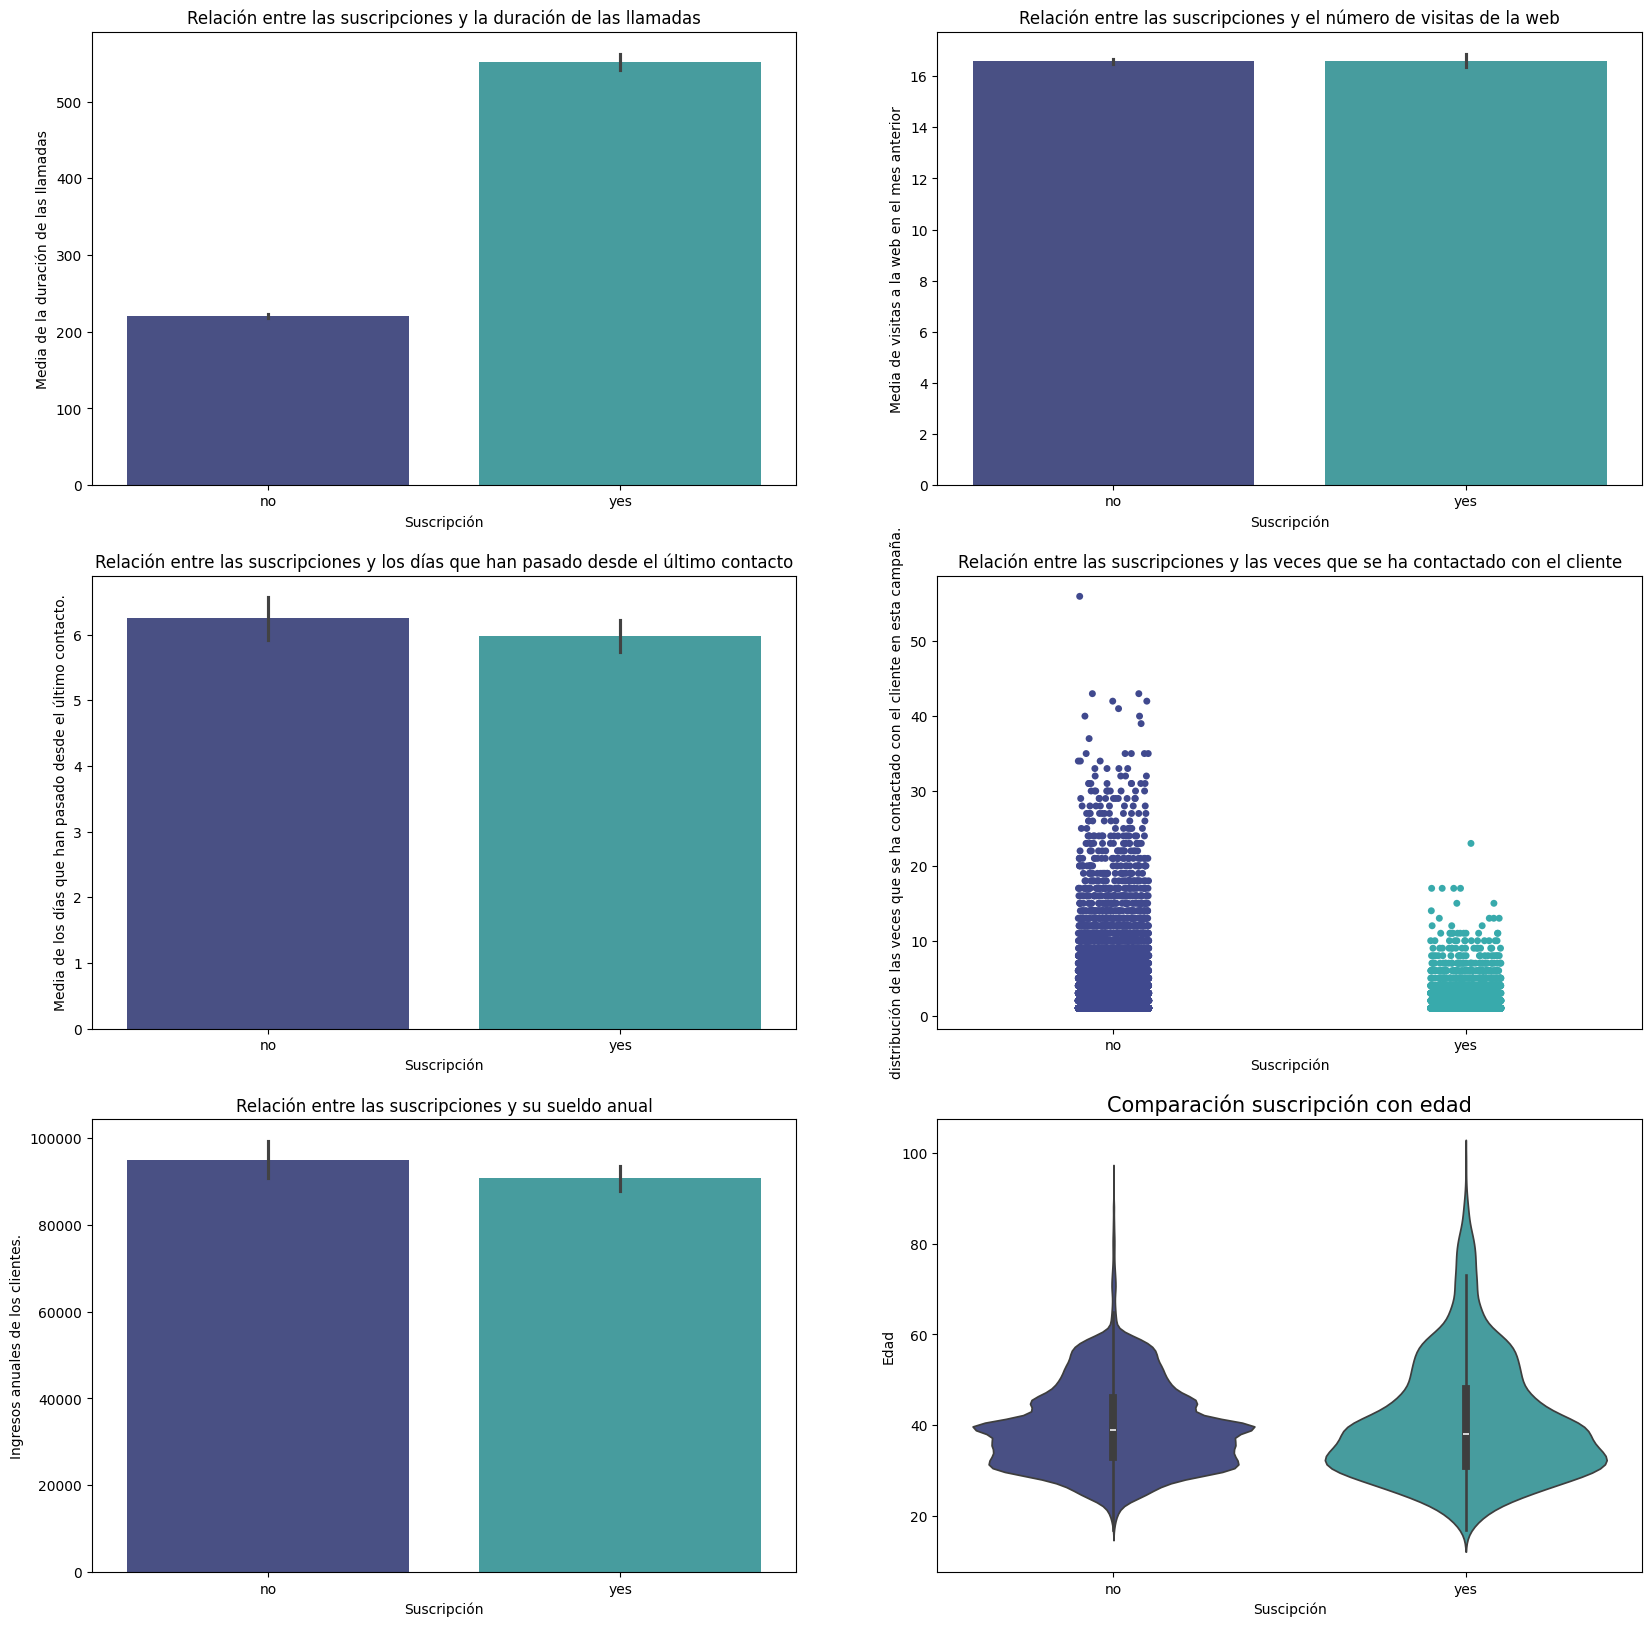

In [106]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))
sns.barplot(x = "y", y = "duration", data = bank, ax = axes[0,0], hue = 'y', legend = False,palette = "mako")
# Cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
axes[0,0].set_xlabel('Suscripción')
axes[0,0].set_ylabel("Media de la duración de las llamadas")
axes[0,0].set_title('Relación entre las suscripciones y la duración de las llamadas')

sns.barplot(x = "y", y = "numwebvisitsmonth", data = bank, ax = axes[0,1], hue = 'y', legend = False, palette = "mako")
axes[0,1].set_xlabel('Suscripción')
axes[0,1].set_ylabel("Media de visitas a la web en el mes anterior")
axes[0,1].set_title('Relación entre las suscripciones y el número de visitas de la web')

# Creamos un DF con los datos de 'pdays' que son distintos de 'unknown'
pdays = bank[bank['pdays'] != 'unknown']
pdays['pdays'] = pdays['pdays'].apply(lambda x: float(x))

sns.barplot(x = "y", y = "pdays", data = pdays, ax = axes[1,0], hue = 'y', legend = False, palette = "mako")
axes[1,0].set_xlabel('Suscripción')
axes[1,0].set_ylabel("Media de los días que han pasado desde el último contacto.")
axes[1,0].set_title('Relación entre las suscripciones y los días que han pasado desde el último contacto')

sns.stripplot(x = "y", y = "campaign", data = bank, ax = axes[1,1], hue = 'y', legend = False, palette = "mako")
axes[1,1].set_xlabel('Suscripción')
axes[1,1].set_ylabel("distribución de las veces que se ha contactado con el cliente en esta campaña.")
axes[1,1].set_title('Relación entre las suscripciones y las veces que se ha contactado con el cliente')

sns.barplot(x = "y", y = "income", data = pdays, ax = axes[2,0], hue = 'y', legend = False, palette = "mako")
axes[2,0].set_xlabel('Suscripción')
axes[2,0].set_ylabel("Ingresos anuales de los clientes.")
axes[2,0].set_title('Relación entre las suscripciones y su sueldo anual')

sns.violinplot(x = "y", y = "age", data = bank, hue = 'y', ax = axes[2,1], legend = False, palette = "mako")
axes[2,1].set_title("Comparación suscripción con edad",fontsize = 15)
axes[2,1].set_xlabel('Suscipción')
axes[2,1].set_ylabel('Edad')

Vamos a ir analizando gráfica por gráfica.
- **duration**: Aquí podemos ver que cuanto más larga es la llamada más probable es que el cliente se suscriba.
- **numwebvisitsmonth**: En este caso observamos que no hay diferencias significativas entre el número de visitas a la web el mes anterior y la suscripción.
- **pdays**: Aquí vemos una pequeña diferencia, pero no es significativa.
- **campaign**: En esta última gráfica podemos observar cómo al haber tenido más contactos con el cliente durante esta campaña es más fácil que no se suscriban.
- **income**: Podemos observar cómo la media de los ingresos anuales de la gente que decide suscribirse es algo menor que la gente que no se decanta por esta opción.
- **age**:Aquí podemos observar cómo la distribución es más o menos uniforme hasta llegar a los 60 años, donde a partir de esa edad es más probable que la gente se suscriba


# 3.5. Analizar la distribucíon del estado civil del cliente ('marital') en función de las suscripciones (‘y’) mediante dos subplot (pieplots)

In [96]:
# Creamos un DataFrame con el conteo de clientes que se han suscrito en función de su estado civil
df_marital_yes = bank[bank['y'] == 'yes'].groupby('marital')['id'].count().reset_index()
display(df_marital_yes)
# Creamos un DataFrame con el conteo de clientes que no se han suscrito en función de su estado civil
df_marital_no = bank[bank['y'] == 'no'].groupby('marital')['id'].count().reset_index()
display(df_marital_no)

,marital,id
0,divorced,490
1,married,2668
2,single,1686


,marital,id
0,divorced,4321
1,married,23416
2,single,10419


In [97]:
fig = make_subplots(
    rows = 1, cols = 2,
    column_widths = [3, 2],
    row_heights = [3],
    specs = [[{"type": "domain"}, {"type": "domain"}]], subplot_titles = ['Suscritos', 'No suscritos'])
fig.add_trace(go.Pie(labels = ['divorced','married','single'],
						 values = df_marital_yes['id'],
             name ='marital',marker_colors = ['#497691','#49638B','#489C9E'],
             ),
             row = 1,col = 1)
fig.add_trace(go.Pie(labels = ['divorced','married','single'],
						 values = df_marital_no['id'],
             name ='marital',marker_colors = ['#497691','#49638B','#489C9E'],
             ),
             row = 1,col = 2)
fig.update_layout(title_text='Distribución por estado civil del cliente')

Aquí podemos observar que la proporción cambia un poco en el caso de los usuarios solteros y casados. Siendo el porcentaje de solteros no suscritos un 35% y el de suscritos un 27%. Miuentras que en los casados no suscritos tenemos un 55% y suscritos un 61%

# 3.6. Analizar la distribucíon de la forma de contacto con el cliente ('contact') en función de las suscripciones (‘y’) mediante dos subplot (pieplots)

In [98]:
# Creamos un DataFrame con el conteo de clientes que se han suscrito en función de su estado civil
df_contact_yes = bank[bank['y'] == 'yes'].groupby('contact')['id'].count().reset_index()
display(df_contact_yes)
# Creanos un DataFrame con el conteo de clientes que no se han suscrito en función de su estado civil
df_contact_no = bank[bank['y'] == 'no'].groupby('contact')['id'].count().reset_index()
display(df_contact_no)

,contact,id
0,cellular,4039
1,telephone,805


,contact,id
0,cellular,23357
1,telephone,14799


In [99]:
fig = make_subplots(
    rows = 1, cols = 2,
    column_widths = [3, 2],
    row_heights = [3],
    specs = [[{"type": "domain"}, {"type": "domain"}]], subplot_titles = ['Suscritos', 'No suscritos'])
fig.add_trace(go.Pie(labels = ['cellular','telephone'],
						 values = df_contact_yes['id'],
             name ='contact',marker_colors = ['#489C9E','#495084'],
             ),
             row = 1, col = 1)
fig.add_trace(go.Pie(labels = ['cellular','telephone'],
						 values = df_contact_no['id'],
             name = 'contact', marker_colors = ['#489C9E','#495084'],
             ),
             row = 1, col = 2)
fig.update_layout(title_text = 'Distribución por forma de contacto con el cliente')

Aquí podemmos ver cómo la distribución de suscripciones cambia considerablemente en función de la forma de contacto. Vemos cómo la gente a la que contactamos por teléfono es más fácil que sí se suscriban. ¿Tendrá esto algo que ver con la edad de la gente que se suscribe?

# 3.7. Analizar la distribucíon de la forma de contacto ('contact') y la edad ('age') en función de las suscripciones (‘y’) mediante un violinplot

In [100]:
fig = px.violin(bank, y = 'age', x = 'contact', color = 'y', box = True,
                color_discrete_map = {'yes':'#489C9E','no':'#495084'},
                labels = dict(age = 'Edad del usuario',
													 contact = 'Forma de contacto'),)
fig.update_layout(title = dict(text = "Distribución de las suscripciones con la forma de contacto y la edad.", 
															 font = dict(size = 30),
															 automargin = True,
															 yref = 'paper',
															 x = 0.1,
															 y = 1))

fig.show()

Observamos cómo el móvil está más estandarizado entre los usuarios de una edad de unos 30 años mientras que el pico de usuarios de teléfono lo tenemos en los usuarios de 40. En el caso de móvil podemos ver cómo los usuarios de por debajo de 30 años es más fácil que decidan suscribirse. Mientras que en los usuarios de teléfono eso ocurre entre los 30ny los 40.

# 3.8. Analizar la relación entre los contactos previos con los clientes antes de esta campaña con las suscripciones (‘y’) mediante un histograma (histplot)

Text(0, 0.5, 'Usuarios contactados')

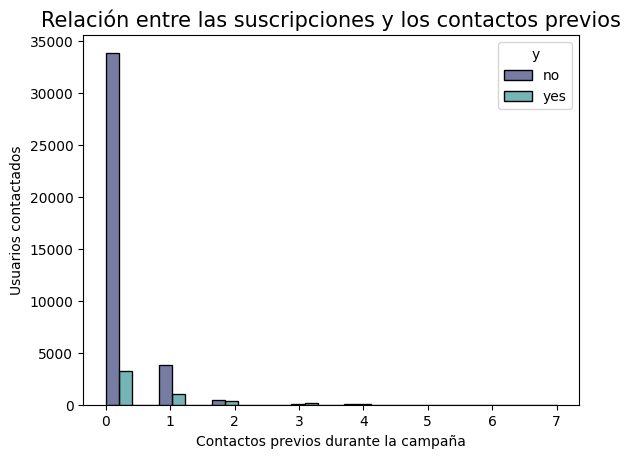

In [101]:
# Creamos el Histograma
ax = sns.histplot(bank,x = 'previous', 
									hue = 'y',
			            multiple = "dodge", 
									palette = {'yes':'#489C9E','no':'#495084'})
ax.set_title("Relación entre las suscripciones y los contactos previos",fontsize = 15)
ax.set_xlabel('Contactos previos durante la campaña')
ax.set_ylabel('Usuarios contactados')

Aquí podemos ver que a la mayoría de los usuarios no habíamos contactado previamente y que cuando esto ocurre lo más probable es que no decidan suscribirse. Vamos a eliminar esta columna para poder visualizar mejor el resto de los casos.

Text(0, 0.5, 'Usuarios contactados')

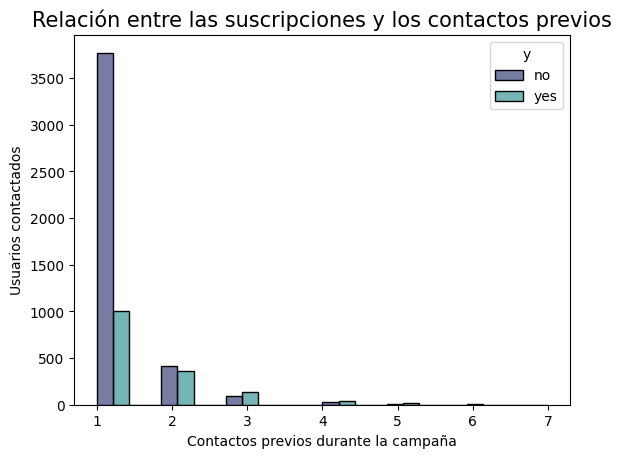

In [102]:
previous=bank[bank['previous'] > 0]
ax = sns.histplot(previous,x = 'previous', 
									hue = 'y',
			            multiple = "dodge", 
									palette = {'yes':'#489C9E','no':'#495084'})
ax.set_title("Relación entre las suscripciones y los contactos previos",fontsize = 15)
ax.set_xlabel('Contactos previos durante la campaña')
ax.set_ylabel('Usuarios contactados')

Aquí podemos ver cómo a medida que más vamos contactando con los usuarios repetidas veces la diferencia entre la gente que se suscribe y la que no se va disminuyendo.

Por último, vamos a comprobar qué ocurre con los clientes en función de la campaña de márketing anterioir.

# 3.9. Analizar el resultado de la campaña anterior ('poutcome') en función de las suscripciones (‘y’) mediante dos subplot (pieplots)

In [176]:
# Creamos un DataFrame con el conteo de clientes que se han suscrito en función de la campaña anterior
df_poutcome_yes = bank[bank['y'] == 'yes'].groupby('poutcome')['id'].count().reset_index()

# Creanos un DataFrame con el conteo de clientes que no se han suscrito en función de la campaña anterior
df_poutcome_no = bank[bank['y'] == 'no'].groupby('poutcome')['id'].count().reset_index()

# Eliminamos del DF los valores de 'noexistent' para unicamente comparar los casos de 'success' o 'failure' de la campaña anterior con la actual
df_poutcome_yes=df_poutcome_yes.drop(1)
display(df_poutcome_yes)
df_poutcome_no=df_poutcome_no.drop(1)
display(df_poutcome_no)


,poutcome,id
0,failure,635
2,success,938


,poutcome,id
0,failure,3826
2,success,498


In [154]:
fig = make_subplots(
    rows = 1, cols = 2,
    column_widths = [3, 2],
    row_heights = [3],
    specs = [[{"type": "domain"}, {"type": "domain"}]], subplot_titles = ['Suscritos', 'No suscritos'])
fig.add_trace(go.Pie(labels = ['failure','success'],
						 values = df_poutcome_yes['id'],
             name = 'poutcome',marker_colors = ['#497691','#489C9E'],
             ),
             row = 1,col = 1)
fig.add_trace(go.Pie(labels = ['failure','success'],
						 values = df_poutcome_no['id'],
             name = 'poutcome',marker_colors = ['#497691','#489C9E'],
             ),
             row = 1,col = 2)
fig.update_layout(title_text = 'Distribución por éxito de la campaña anterior')

# # original labels with 3 values
# labels = ['failure','nonexistent','success']

Aquí podemos ver la gran diferencia entre las personas que ya se habían suscrito con la campaña anterior. En estos casos los usuarios deciden NO volver a suscribirse.

# 4. Redacta las conclusiones a las que has llegado después de hacer el análisis.

Las conclusiones que sacamos con este EDA son:

- La campaña no está funcionando, ya que casi el 90% de las llamadas no son fructíferas y los clientes no se están suscribiendo.
- El número de llamadas a lo largo del tiempo no ha fluctuado demasiado, además tenemos una distribución uniforme del número de llamadas por mes, así como el reparto entre suscritos y no suscritos.
- Cuánto más larga es la llamada más fácil es que el cliente decida aceptar.
- A partir de los 10 contactos con el cliente durante la misma campaña muy probablemente no decidan suscribirse. Sin embargo, si los contactos se han realizado antes de esta campaña los resultados se invierten. 
- Los usuarios a los que más le está convenciendo la campaña son los que tienen más de 60 años, además llegamos más a los usuarios casados frente a los solteros.
- Principalmente las suscripciones vienen de las llamadas realizadas a teléfonos frente a la de los móviles. Esto puede ser debido a que nos marquen la llamada como spam o que es más dificil que la gente atienda una llamada realizada por un número que no conoce desde el móvil.
- Por último, la gente que en la anterior campaña se suscribieron tiene una alta tasa de no suscripciones.

